## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

In [225]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Guided Practice:
1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:
    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [226]:
gdp = pd.read_csv('../data/gdp_per_capita.csv')
gdp.rename(columns={"Country or Area": "Country",'Value':'GDP'}, inplace=True)
gdp.head()

,Country,Year,GDP,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [227]:
gdp.drop(columns=['Value Footnotes'], axis = 1, inplace=True)
gdp.head()

,Country,Year,GDP
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [228]:
gdp.shape

(7176, 3)

In [229]:
gdp.dtypes

Country     object
Year         int64
GDP        float64
dtype: object

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [230]:
#gdp['Year']
years = gdp['Year'].unique()
years.sort()
print(years)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [231]:
#gdp['Year'].unique().sort()

In [232]:
year_observations = gdp['Year'].value_counts().reset_index().rename(columns ={'index':'Year','Year':'Count'} )
year_observations.head()

,Year,Count
0,2017,242
1,2016,242
2,2018,242
3,2014,242
4,2013,242


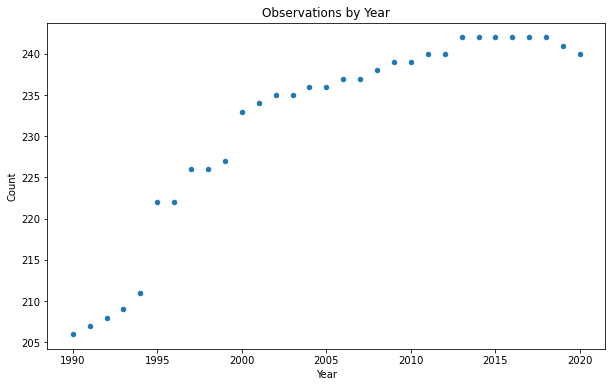

In [233]:
year_observations.plot(kind = 'scatter', x = 'Year', y = 'Count', figsize = (10,6))
plt.title('Observations by Year');

8. How many countries are represented in this dataset?  

In [234]:
gdp['Country'].nunique()

242

Which countries are least represented in the dataset?

In [235]:
country_observations = gdp['Country'].value_counts().rename_axis('Country').reset_index(name='Count')
country_observations.tail(5)

,Country,Count
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8
241,Djibouti,8


Why do you think these countries have so few observations?

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [236]:
gdp_2014 = gdp[gdp['Year'] == 2014]
gdp_2014.head()

,Country,Year,GDP
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [237]:
gdp_2014['GDP'].describe()

count       242.000000
mean      19612.875611
std       20961.714572
min         822.611195
25%        4702.212961
50%       12178.874687
75%       26461.384188
max      155201.740571
Name: GDP, dtype: float64

Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

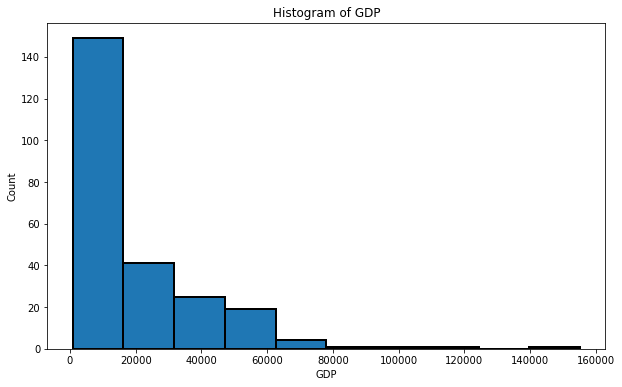

In [238]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = gdp_2014,
    x = 'GDP',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('GDP')                            
plt.ylabel('Count')
plt.title('Histogram of GDP');

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2018.

In [239]:
gdp_2018 = gdp[gdp['Year'] == 2018]
gdp_2018.nlargest(5, 'GDP')

,Country,Year,GDP
3915,"Macao SAR, China",2018,132373.544079
3884,Luxembourg,2018,115049.926079
5722,Singapore,2018,98336.956494
5383,Qatar,2018,90970.060902
3073,Ireland,2018,83726.362961


In [240]:
gdp_2018.nsmallest(5, 'GDP')

,Country,Year,GDP
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2018 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named `gdp_pivoted`.

In [241]:
gdp_pivoted = np.round(pd.pivot_table(gdp, values='GDP', 
                                index=['Country'], 
                                columns=['Year'], 
                                #aggfunc=np.mean,
                                fill_value=0),1)
gdp_pivoted.head(5)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1904.6,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4,2033.8,2065.0,1970.6
Africa Eastern and Southern,3084.0,2998.4,2858.9,2768.1,2741.7,2788.9,2864.2,2910.5,2889.0,2892.7,...,3589.3,3576.6,3626.8,3677.3,3694.9,3691.3,3694.9,3697.3,3684.3,3492.0
Africa Western and Central,2810.3,2770.7,2765.0,2664.9,2593.4,2579.8,2630.3,2672.0,2694.5,2667.2,...,3872.8,3966.1,4092.8,4215.6,4216.4,4121.2,4115.6,4132.6,4159.8,4021.3
Albania,4827.0,3496.4,3264.8,3598.8,3921.6,4471.6,4908.9,4400.3,4819.1,5474.9,...,11052.8,11228.0,11361.3,11586.8,11878.5,12291.9,12771.0,13317.1,13653.2,13253.7
Algeria,8746.3,8431.4,8383.8,8027.4,7792.1,7935.2,8116.9,8074.7,8360.1,8506.3,...,11078.2,11233.5,11319.1,11512.7,11697.0,11826.2,11737.4,11630.7,11522.0,10735.4


In [244]:
#gdp_pivoted.columns
#gdp_pivoted.loc[['Afghanistan','Africa Eastern and Southern']]
#gdp_pivoted.loc[['Afghanistan'],[1990]]

#gdp_pivoted.loc[[1990]]

#gdp_pivoted[[1990,2018]]
#gdp_pivoted[(gdp_pivoted[1990]==0.0)]


#gdp_pivoted[(gdp_pivoted[1990]==2066.4)|(gdp_pivoted[2018]==9548.7)]

#p_table.query('color=="black"')
#filtered_gdp_pivoted = gdp_pivoted[(gdp_pivoted[1992018]==0.0)]

gdp_pivoted_filtered = gdp_pivoted[(gdp_pivoted[1990]>0)|(gdp_pivoted[2018]==0)].copy()
gdp_pivoted_filtered.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3084.0,2998.4,2858.9,2768.1,2741.7,2788.9,2864.2,2910.5,2889.0,2892.7,...,3589.3,3576.6,3626.8,3677.3,3694.9,3691.3,3694.9,3697.3,3684.3,3492.0
Africa Western and Central,2810.3,2770.7,2765.0,2664.9,2593.4,2579.8,2630.3,2672.0,2694.5,2667.2,...,3872.8,3966.1,4092.8,4215.6,4216.4,4121.2,4115.6,4132.6,4159.8,4021.3
Albania,4827.0,3496.4,3264.8,3598.8,3921.6,4471.6,4908.9,4400.3,4819.1,5474.9,...,11052.8,11228.0,11361.3,11586.8,11878.5,12291.9,12771.0,13317.1,13653.2,13253.7
Algeria,8746.3,8431.4,8383.8,8027.4,7792.1,7935.2,8116.9,8074.7,8360.1,8506.3,...,11078.2,11233.5,11319.1,11512.7,11697.0,11826.2,11737.4,11630.7,11522.0,10735.4
Angola,5759.0,5625.9,5126.5,3772.5,3701.6,4122.1,4532.4,4708.1,4772.4,4720.6,...,7676.6,8037.7,8141.2,8240.3,8036.6,7569.2,7310.9,6982.1,6712.0,6142.0


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [245]:
gdp_pivoted_filtered ['Percent_Change'] = ((gdp_pivoted_filtered[2018]-gdp_pivoted_filtered[1990])/gdp_pivoted_filtered[1990])*100
gdp_pivoted_filtered.head(1)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3084.0,2998.4,2858.9,2768.1,2741.7,2788.9,2864.2,2910.5,2889.0,2892.7,...,3576.6,3626.8,3677.3,3694.9,3691.3,3694.9,3697.3,3684.3,3492.0,19.886511


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2018?

In [246]:
negative_gdp = gdp_pivoted_filtered[gdp_pivoted_filtered ['Percent_Change'] <0]
negative_gdp_filtered = Negative_GDP.loc[:,[1990,2018,"Percent_Change"]]
negative_gdp_filtered.head(5)

Year,1990,2018,Percent_Change
Country,,,
Brunei,71232.8,60389.2,-15.222763
Burundi,1184.8,761.5,-35.727549
Central African Republic,1201.7,933.1,-22.351668
Congo,5068.3,3928.4,-22.490776
Dem. Rep. Congo,1819.7,1085.9,-40.325328


16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [247]:
gdp_pivoted_filtered_sort = gdp_pivoted_filtered.sort_values(by =['Percent_Change'], ascending = False)
gdp_pivoted_filtered_sort.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1040.0,996.9,1299.9,1395.4,1572.1,1781.3,2857.5,6868.5,8166.0,9851.3,...,36671.4,33678.7,32436.6,28313.4,24827.0,22551.0,20386.0,18600.4,17214.7,1860.192308
China,1423.9,1534.7,1731.7,1949.5,2178.9,2391.5,2601.4,2812.7,3004.4,3206.7,...,10370.7,11101.9,11851.4,12612.4,13399.1,14243.5,15134.0,15977.8,16296.8,962.855538
Myanmar,564.2,562.6,580.8,618.8,653.2,692.0,729.2,763.3,796.9,853.8,...,3113.0,3330.5,3574.0,3663.1,4020.2,4224.5,4467.9,4739.7,4857.4,691.900035
East Asia & Pacific (excluding high income),2186.6,2317.6,2515.8,2738.1,2976.2,3218.2,3456.6,3640.5,3623.7,3792.1,...,9792.1,10392.9,11001.7,11625.2,12280.8,12987.4,13727.5,14425.3,14471.4,527.801152
East Asia & Pacific (IDA & IBRD),2211.9,2344.4,2544.9,2769.9,3010.8,3255.6,3496.8,3682.7,3665.6,3835.9,...,9902.9,10510.0,11125.3,11755.4,12417.9,13131.9,13880.0,14585.3,14631.8,527.514806


In [248]:
top_two_line = gdp_pivoted_filtered.loc[['Equatorial Guinea','China']]
top_two_line.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1040.0,996.9,1299.9,1395.4,1572.1,1781.3,2857.5,6868.5,8166.0,9851.3,...,36671.4,33678.7,32436.6,28313.4,24827.0,22551.0,20386.0,18600.4,17214.7,1860.192308
China,1423.9,1534.7,1731.7,1949.5,2178.9,2391.5,2601.4,2812.7,3004.4,3206.7,...,10370.7,11101.9,11851.4,12612.4,13399.1,14243.5,15134.0,15977.8,16296.8,962.855538


In [249]:
top_two_line_flat = top_two_line.reset_index().rename_axis(index=None, columns = None)
top_two_line_flat.drop(columns = ['Percent_Change'], inplace = True)
top_two_line_flat.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Equatorial Guinea,1040.0,996.9,1299.9,1395.4,1572.1,1781.3,2857.5,6868.5,8166.0,...,35377.7,36671.4,33678.7,32436.6,28313.4,24827.0,22551.0,20386.0,18600.4,17214.7
1,China,1423.9,1534.7,1731.7,1949.5,2178.9,2391.5,2601.4,2812.7,3004.4,...,9680.1,10370.7,11101.9,11851.4,12612.4,13399.1,14243.5,15134.0,15977.8,16296.8


In [250]:
top_two_line_melt = pd.melt(top_two_line_flat,id_vars="Country", var_name = 'Year', value_name = 'GDP')
top_two_line_melt.head()

,Country,Year,GDP
0,Equatorial Guinea,1990,1040.0
1,China,1990,1423.9
2,Equatorial Guinea,1991,996.9
3,China,1991,1534.7
4,Equatorial Guinea,1992,1299.9


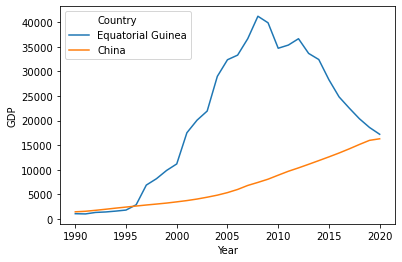

In [251]:
sns.lineplot(x='Year', y='GDP', data=top_two_line_melt, hue='Country')

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [252]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [253]:
country_continent = pd.merge(gdp, continents, on='Country', how='inner')
country_continent.head()

,Country,Year,GDP,Continent
0,Afghanistan,2020,1970.560169,Asia
1,Afghanistan,2019,2065.036235,Asia
2,Afghanistan,2018,2033.804389,Asia
3,Afghanistan,2017,2058.400221,Asia
4,Afghanistan,2016,2057.067978,Asia


19. Determine the number of countries per continent. Create a bar chart showing this.

In [254]:
continent_groupby = country_continent.groupby('Continent')['Country'].nunique().reset_index(name='Country_Count')
continent_groupby.head()

,Continent,Country_Count
0,Africa,50
1,Asia,42
2,Europe,45
3,North America,26
4,Oceania,14


Text(0.5, 1.0, 'Countries by Continent')

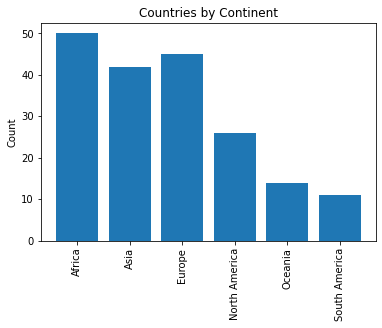

In [255]:
plt.bar(continent_groupby.Continent,
        continent_groupby.Country_Count)
plt.ylabel('Count')
#plt.xlabel('Continent')
plt.xticks(rotation = 90)
plt.title('Countries by Continent')

20. Create a seaborn boxplot showing GDP per capita in 2018 split out by continent. What do you notice?

In [256]:
country_continent_2018 = country_continent[country_continent['Year']==2018]
country_continent_2018.head()

,Country,Year,GDP,Continent
2,Afghanistan,2018,2033.804389,Asia
21,Albania,2018,13317.092313,Europe
52,Algeria,2018,11630.679409,Africa
83,Angola,2018,6982.129420,Africa
114,Antigua and Barbuda,2018,21017.264500,North America


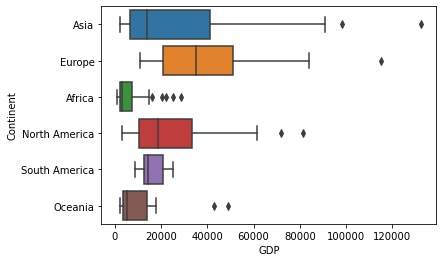

In [257]:
sns.boxplot(y=country_continent_2018["Continent"], x=country_continent["GDP"] );
plt.show()

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correc this without modifying the original csv file.

In [258]:
life_exp = pd.read_csv('../data/life_exp.csv')
life_exp.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152,64.537,64.752,65.132,65.294,65.502,...,75.636,75.601,75.683,75.617,75.903,76.072,76.248,75.723,74.626,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [259]:
life_exp.drop(columns=['Country Code','Indicator Name','Indicator Code'], axis = 1, inplace=True)
life_exp.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,60.709870,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN


In [265]:
life_exp_melt = pd.melt(life_exp,id_vars="Country Name", var_name = 'Year', value_name = 'Life_Exp')
life_exp_melt.rename(columns={"Country Name": "Country"}, inplace=True)
life_exp_melt.head()

,Country,Year,Life_Exp
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000


In [273]:
life_exp_melt['Year'] = life_exp_melt['Year'].astype(int)

In [274]:
#life_exp_melt_key = pd.melt(life_exp,id_vars="Country Name", var_name = 'Year', value_name = 'Life_Exp')
#life_exp_melt_key.rename(columns={"Country Name": "Country"}, inplace=True)
#life_exp_melt_key['Country_Key'] = life_exp_melt_key['Country'] + ("-" + life_exp_melt_key['Year'])
#life_exp_melt_key.head()

23. What was the first country with a life expectancy to exceed 80?

In [275]:
life_exp_melt[life_exp_melt['Life_Exp']>=80]

,Country,Year,Life_Exp
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16420,Portugal,2021,81.073171
16434,Singapore,2021,83.441463
16448,Slovenia,2021,80.875610
16449,Sweden,2021,83.156098


24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [276]:
#gdp['Year'] = gdp['Year'].astype(str)
#gdp['Country_Key'] = gdp['Country'] + ("-" + gdp['Year'])
#gdp.head()

In [277]:
gdp_le = pd.merge(gdp, life_exp_melt, on=['Country','Year'], how='inner')
#gdp_le = pd.merge(gdp, life_exp_melt_key, on=['Country_Key', how='inner')
gdp_le.head()

,Country,Year,GDP,Life_Exp
0,Afghanistan,2020,1970.560169,62.575
1,Afghanistan,2019,2065.036235,63.565
2,Afghanistan,2018,2033.804389,63.081
3,Afghanistan,2017,2058.400221,63.016
4,Afghanistan,2016,2057.067978,63.136


In [278]:
gdp_le.tail()

,Country,Year,GDP,Life_Exp
6572,Zimbabwe,1994,2603.927369,52.588
6573,Zimbabwe,1993,2420.092791,54.426
6574,Zimbabwe,1992,2437.152908,56.435
6575,Zimbabwe,1991,2733.696626,58.091
6576,Zimbabwe,1990,2652.129209,59.426


25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

In [279]:
gdp_le_2019 = gdp_le[gdp_le['Year']== 2019].copy()
gdp_le_2019.head()

,Country,Year,GDP,Life_Exp
1,Afghanistan,2019,2065.036235,63.565000
20,Africa Eastern and Southern,2019,3684.315172,63.755678
51,Africa Western and Central,2019,4159.844650,57.555796
82,Albania,2019,13653.201570,79.282000
113,Algeria,2019,11521.984210,76.474000


In [280]:
Over_80 = gdp_le_2019[gdp_le_2019['Life_Exp']>=80].reset_index()
Over_80.shape[0]

39

26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [281]:
gdp_le_2019.nlargest(3,'GDP')

,Country,Year,GDP,Life_Exp
3552,"Macao SAR, China",2019,127272.548511,84.978000
3521,Luxembourg,2019,116518.276815,82.639024
5246,Singapore,2019,98283.308908,83.595122


In [282]:
top_3 = ['Macao SAR, China','Luxembourg','Singapore']
gdp_top_3 = gdp_le.query("Country in @top_3")
gdp_top_3 = gdp_top_3.reset_index()
gdp_top_3.tail(5)

,index,Country,Year,GDP,Life_Exp
88,5271,Singapore,1994,46819.522993,76.197561
89,5272,Singapore,1993,43486.234224,76.046341
90,5273,Singapore,1992,40014.826063,75.946341
91,5274,Singapore,1991,38667.750581,75.646341
92,5275,Singapore,1990,37289.751704,75.295122


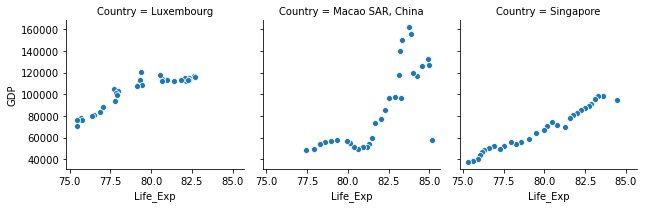

In [283]:
a = sns.FacetGrid(gdp_top_3, col='Country')
a.map(sns.scatterplot,'Life_Exp','GDP')
#a.set(xticks=[2004, 2009, 2014])
a.add_legend();

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

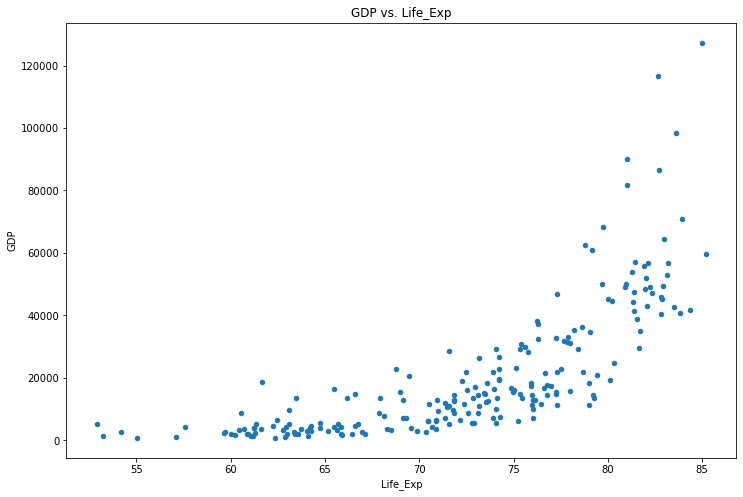

In [284]:
gdp_le_2019.plot(kind = 'scatter', x = 'Life_Exp', y = 'GDP', figsize = (12,8))
plt.title('GDP vs. Life_Exp');

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [285]:
gdp_le_2019[['Life_Exp', 'GDP']].corr()

,Life_Exp,GDP
Life_Exp,1.000000,0.736861
GDP,0.736861,1.000000


| $r$  | interpretation  |
|---|---|
| 1  | Perfect positive relationship  |
| 0.8  | Strong positive relationship  |
| 0.5 | Moderate positive relationship  |
| 0.2 | Weak positive relationship |
| 0 | No linear relationship |
| -0.2 | Weak negative relationship |
| -0.5 | Moderate negative relationship |
| -0.8 | Strong negative relationship |
| -1 | Perfect negative relationship |

29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [286]:
gdp_le_2019['GDP_log'] = np.log(gdp_le_2019['GDP'])
gdp_le_2019.head()

,Country,Year,GDP,Life_Exp,GDP_log
1,Afghanistan,2019,2065.036235,63.565000,7.632903
20,Africa Eastern and Southern,2019,3684.315172,63.755678,8.211840
51,Africa Western and Central,2019,4159.844650,57.555796,8.333233
82,Albania,2019,13653.201570,79.282000,9.521729
113,Algeria,2019,11521.984210,76.474000,9.352012


In [287]:
gdp_le_2019.head()

,Country,Year,GDP,Life_Exp,GDP_log
1,Afghanistan,2019,2065.036235,63.565000,7.632903
20,Africa Eastern and Southern,2019,3684.315172,63.755678,8.211840
51,Africa Western and Central,2019,4159.844650,57.555796,8.333233
82,Albania,2019,13653.201570,79.282000,9.521729
113,Algeria,2019,11521.984210,76.474000,9.352012


In [288]:
gdp_le_2019[['Life_Exp', 'GDP_log' ]].corr()

,Life_Exp,GDP_log
Life_Exp,1.000000,0.868311
GDP_log,0.868311,1.000000


### Solo Exploration and Presentation:

1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find. 

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).